# Panji J  Situmorang

# 12S16013

In [1]:
# Exercise 1 | Clustering with K-Means

# Exercise 1.1 | Scratch

In [2]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('D:/SEMESTER 7/praktikum cluster naalisi/loan_dataset.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


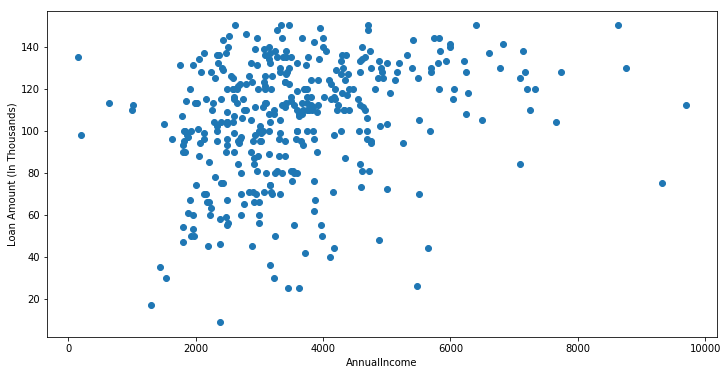

In [4]:
X = data[["ApplicantIncome", "LoanAmount"]]

#Visualise data points
plt.figure(figsize=(12,6))
plt.scatter(X["ApplicantIncome"], X["LoanAmount"])
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

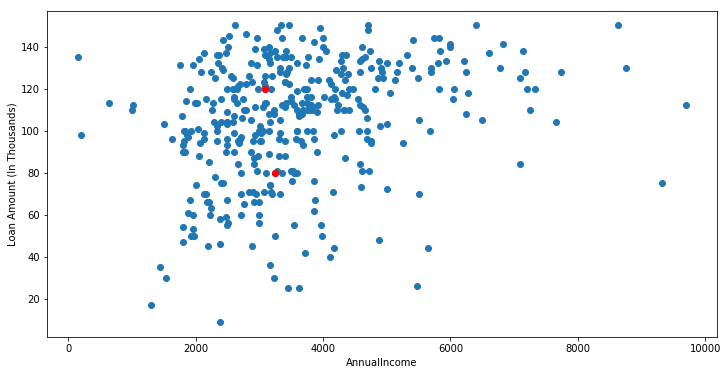

In [5]:
#number of cluster
K=2

#select random observation as centroids
Centroids = (X.sample(n=K))
plt.figure(figsize=(12,6))
plt.scatter(X["ApplicantIncome"], X["LoanAmount"])
plt.scatter(Centroids["ApplicantIncome"], Centroids["LoanAmount"], c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [6]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1
        
    C=[]
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount", "ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + \
        (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount", "ApplicantIncome"]]

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


441.5783598464128
306.38353278902366
229.31045043617587
192.12688801901947
78.3416482061933
15.695981556435925
0.0


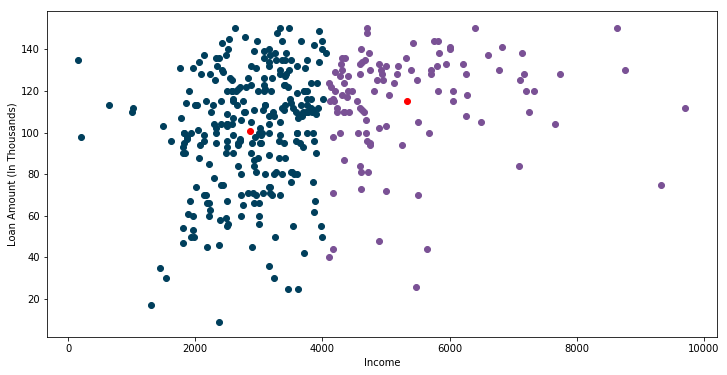

In [6]:
color=['#003f5c', '#7a5195']
plt.figure(figsize=(12,6))

for k in range(K):
    data=X[X["Cluster"] ==k+1]
    plt.scatter(data["ApplicantIncome"], data["LoanAmount"], c=color[k])
    
plt.scatter(Centroids["ApplicantIncome"], Centroids["LoanAmount"], c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

# Exercise 1.2 | Using scikit-learn

In [7]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [7]:
#reading the data and looking at the first fivw rows of data
data=pd.read_csv('D:/SEMESTER 7/praktikum cluster naalisi/loan_dataset.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [8]:
sltd_data = data[["ApplicantIncome", "LoanAmount"]]

#statistics of the data
sltd_data.describe()

,ApplicantIncome,LoanAmount
count,381.000000,381.000000
mean,3579.845144,104.986877
std,1419.813818,28.358464
min,150.000000,9.000000
25%,2600.000000,90.000000
50%,3333.000000,110.000000
75%,4288.000000,127.000000
max,9703.000000,150.000000


In [9]:
#standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(sltd_data)

#statistics of scaled data
pd.DataFrame(data_scaled).describe()

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1
count,3.810000e+02,3.810000e+02
mean,9.994921e-17,-9.179009e-17
std,1.001315e+00,1.001315e+00
min,-2.418877e+00,-3.389221e+00
25%,-6.910297e-01,-5.291748e-01
50%,-1.740860e-01,1.770094e-01
75%,4.994218e-01,7.772660e-01
max,4.318317e+00,1.589378e+00


(-4, 5)

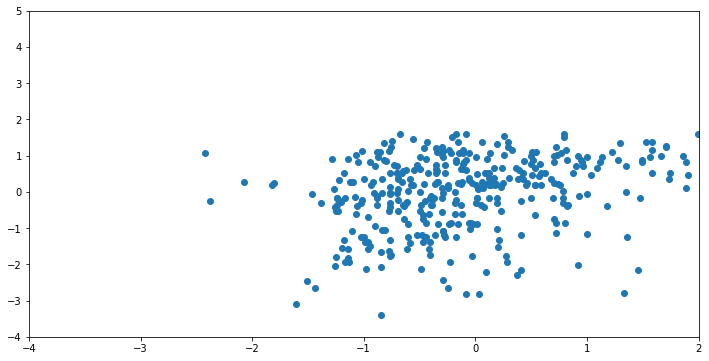

In [11]:
#create scatter plot
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[:,0], data_scaled[:,1])
plt.xlim(-4,2)
plt.ylim(-4,5)

In [12]:
#defining the kmeans function with initialization as random
kmeans = KMeans(n_clusters=2, init='random')

#fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
#save new clusters for chart
y_km = kmeans.fit_predict(data_scaled)

In [14]:
#inertia on the fitted data
kmeans.inertia_

453.5681659194928

Text(0, 0.5, 'Inertia')

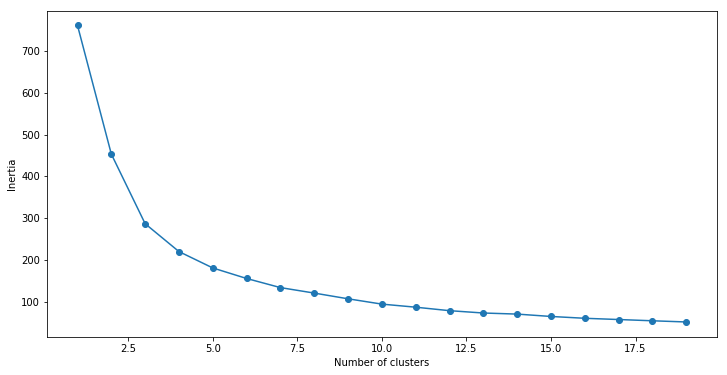

In [15]:
#fitting multiple k-means algorithms and storing the values in an empty list
SSE  =[]
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='random')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
    
#converting the result into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [16]:
#k means using 3 cluster and random initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='random')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [17]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    200
2     97
0     84
Name: cluster, dtype: int64

In [18]:
#inertia on the fitted data
kmeans.inertia_

286.5761231062562

In [19]:
#save new clusters for chart
y_km = kmeans.fit_predict(data_scaled)

(-4, 5)

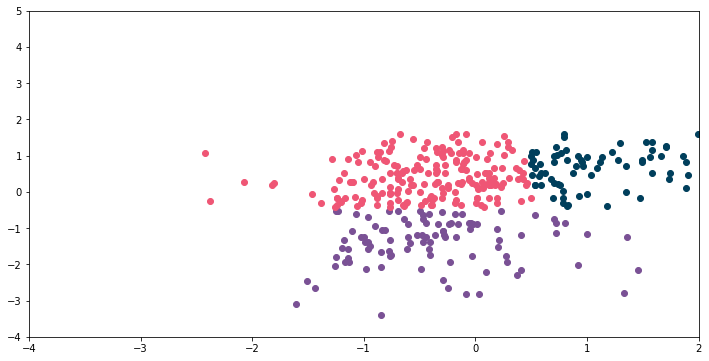

In [20]:
#create scatter plot
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[y_km == 0,0], data_scaled[y_km == 0,1], c='#003f5c')
plt.scatter(data_scaled[y_km == 1,0], data_scaled[y_km == 1,1], c='#7a5195')
plt.scatter(data_scaled[y_km == 2,0], data_scaled[y_km == 2,1], c='#ef5675')
plt.xlim(-4,2)
plt.ylim(-4,5)

# Exercise 2 | Clustering with Agglomerative Nesting (AGNES) using scikit-learn

In [21]:
#import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Exercise 1.2 | Using scikit-learn

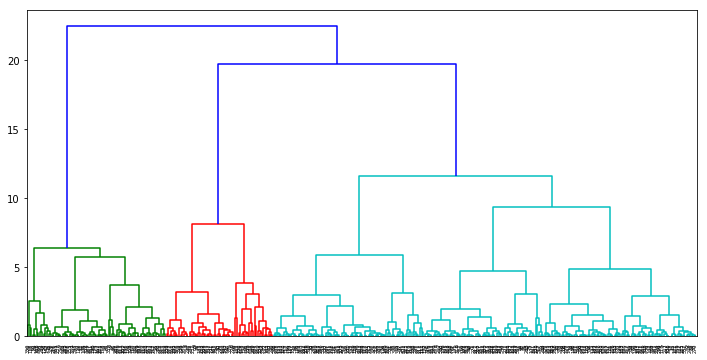

In [22]:
#create dendrogram
plt.figure(figsize=(12,6))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))

#create cluster
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

#save clusters for chart
y_hc = hc.fit_predict(data_scaled)

(-4, 5)

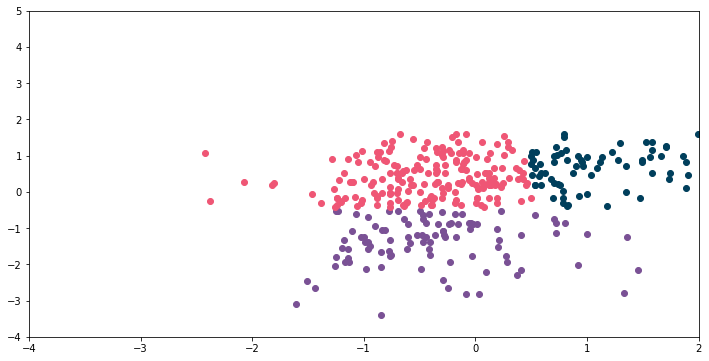

In [23]:
#create scatter plot
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[y_km == 0,0], data_scaled[y_km == 0,1], c='#003f5c')
plt.scatter(data_scaled[y_km == 1,0], data_scaled[y_km == 1,1], c='#7a5195')
plt.scatter(data_scaled[y_km == 2,0], data_scaled[y_km == 2,1], c='#ef5675')
plt.xlim(-4,2)
plt.ylim(-4,5)